# 9. Sympy - Álgebra simbólica en Python

SymPy es una biblioteca de Python para matemática simbólica. SymPy está escrito totalmente en Python y no requiere bibliotecas adicionales.

Sympy es muy útil para:

- Crear símbolos y expresiones.
- Manipular expresiones (simplificación, expansión...)
- Calcular derivadas e integrales.
- Límites y desarrollos en serie.
- Resolución de ecuaciones.
- Resolción de EDOs.
- Matrices



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Para empezar a usar SymPy en un programa o en el notebook Python, importe el módulo **sympy**:

In [2]:
from sympy import *

Para tener una buena formato de salida vamos a usar $\LaTeX$ :

In [3]:
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


### Variables Simbólicas

En SymPy necesitamos crear símbolos para las variables con las que queremos trabajar. Podemos crear un nuevo símbolo usando la clase **Symbol**:

In [4]:
n = Symbol('n')

In [5]:
(n + E)**2 # El numero e se representa como E para sympy

In [6]:
# Forma alternativa de definir símbolos
m, n, p = symbols("m,n,p")

In [7]:
type(m)

sympy.core.symbol.Symbol

Podemos agregar algunas presunciones a los símbolos cuando los creamos:

In [8]:
x = Symbol('x', real=True, positive = False )

In [9]:
x > 0

In [10]:
x.is_imaginary

False

In [11]:
# Podemos ver las asunciones de un símbolo
x.assumptions0

{'commutative': True,
 'complex': True,
 'composite': False,
 'hermitian': True,
 'imaginary': False,
 'nonpositive': True,
 'positive': False,
 'prime': False,
 'real': True}

El número imaginario se representa como **I** y el número pi como **pi**

In [12]:
(I+pi*x)**2

### Números racionales 

Existen tres tipos numéricos diferentes en SymPy: **Real, Rational, Integer**:

In [13]:
n1 = Rational(2,7)
n2 = Rational(3,5)

In [14]:
n1

In [15]:
n1 + n2

In [16]:
n1 / n2

Recuerde que las operaciones con símbolos devuelven símbolos, además si una varibale que almacenaba un símbolo recibe otra asignación, cambia de tipo:

In [17]:
a = Symbol('a')
print(type(a))

#Ahora reasignamos
a = 4
print(type(a))

<class 'sympy.core.symbol.Symbol'>
<class 'int'>


Las variables de tipo Symbol actúan como contenedores en los que no sabemos qué hay (un real, un complejo, una lista...). Hay que tener en cuenta que: una cosa es el nombre de la variable y otra el símbolo con el que se representa.

### Evaluación Numérica

SymPy utiliza una biblioteca para la precisión arbitraria como backend numérico, y tiene expresiones SymPy predefinidas para un número de constantes matemáticas, tales como: pi, e, oo para el infinito.

Para evaluar una expresión numéricamente podemos utilizar la función **evalf** (o **N**). Se toma un argumento n que especifica el número de dígitos significativos.

In [18]:
E.evalf(n=30)

In [19]:
y = (E + x)**3
y

In [20]:
N(y,4) # Usará 4 cifras siginificativas

Cuando evaluamos numéricamente expresiones algebraicas, a menudo queremos sustituir un símbolo por un valor numérico. En SymPy lo hacemos usando la función **subs**:

In [21]:
y.subs(x, 3) # substitution

In [22]:
N(y.subs(x,3))

Por supuesto, la función subs también puede usarse para sustituir Símbolos y expresiones:

In [23]:
y.subs(x, a+E) # recuerden que a=4 :P 

In [24]:
expr = cos(x)**2 + sin(x)**2
expr

In [25]:
# Para simplicar la expresión anterior usamos simplify
simplify(expr)

## Simplificación

SymPy ofrece numerosas funciones para simplificar y manipular expresiones. Entre otras, destacan:

* expand()
* factor()
* collect()
* apart()
* cancel()

In [26]:
expand((x+1)*(x+2)*(x+3))

Tambien podemos hacer lo mismo con expresiones trigonométricas

In [27]:
a = Symbol('a')
b = Symbol('b')
cos(a+b)

In [28]:
expand(cos(a+b), trig=True)

Podemos usar la función expand tambien como si fuera un método:

In [29]:
pol = (2 * x ** 3 + 5 * x + 3) ** 2
pol_exp = pol.expand()
pol_exp

Ahora para factorizarlo:

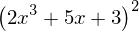

In [30]:
pol_factor = pol_exp.factor()
pol_factor

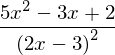

In [31]:
fraccion = (5 * x ** 2 - 3 * x + 2) / (2 * x - 3) ** 2
fraccion

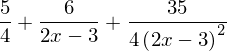

In [32]:
fraccion.apart() # con esta función podemos separarlo

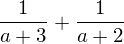

In [33]:
fraccion2 = 1/(a+2) + 1/(a+3)
fraccion2

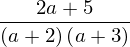

In [34]:
together(fraccion2)

## Cálculo (Derivadas e integrales)

#### Derivadas

Podemos derivar una expresion usando el método .diff() o la función dif():

$$ \frac{d \tan(x)}{dx} $$

In [35]:
# Creamos una expresión
test = tan(x)

# Hacemos la primera derivada
diff(test, x)

También podemos usar el método:

In [36]:
test.diff(x)

In [37]:
# Si queremos la tercera derivada

test.diff(x, 3)

Para el calculo multivariable:

In [38]:
x = Symbol('x')
y = Symbol('y')

mult_var = x ** 3 * sin(y) ** 2 + y ** 3 * cos(x)
mult_var

In [39]:
diff(mult_var, x, 2, y, 3)

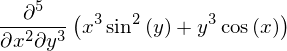

In [40]:
# Para saber que estamos derivando
Derivative(mult_var, x, 2, y, 3)

Tambien aplica regla de la cadena :D

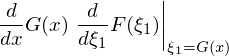

In [41]:
# Creamos una función F
F = Function('F')
G = Function('G')

# Derivamos la función compuesta F(G(x))
F(G(x)).diff(x)

Un ejemplo aplicando esta regla :

In [42]:
# definimos una f
f = 4 * pi * x * exp(x)

# definimos una g(f)
g = sin(y) + f**2 + f*2
g

In [43]:
diff(g,x)

#### Integrales

$$\int{\sin(x)^2}dx$$

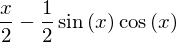

In [44]:
f = sin(x) ** 2
integrate(f)

$$\int{\frac{dx}{\tan(x)}}$$

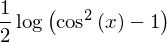

In [45]:
f = 1 / tan(x)
integrate(f)

$$\int{\frac{dx}{(x^2+a^2)^2}}$$

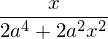

In [46]:
x, a = symbols('x a', real=True)

f = 1 / (x**2 + a**2)**2
integrate(f, x)

$$\int{\sin(xy) + \cos(yz) dx}$$

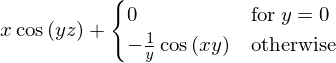

In [47]:
x, y, z = symbols("x,y,z")
f = sin(x*y) + cos(y*z)
integrate(f, x)

Proporcionando límites para la variable de integración podemos evaluar integrales definidas:

In [48]:
integrate(f, (x, -1, 1))

Y también para integrales impropias:

In [49]:
integrate(exp(-x**2), (x, -oo, oo)) # Recordar, oo es la notación SymPy para el infinito.

### Sumatorias y Productorias 

Podemos evaluar sumas y productos usando las funciones: **'Sum'**

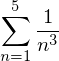

In [50]:
n = Symbol("n")

Sum(1/n**3, (n, 1, 5))

In [51]:
Sum(1/n**2, (n,1, 10)).evalf()

In [52]:
Sum(1/n**2, (n, 1, oo)).evalf()

Los productos funcionan de la misma manera:

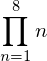

In [53]:
Product(n, (n, 1, 8)) # 8!

## Límites

Calculemos el siguiente límite:

$$\lim_{x \to 0} \frac{b^{x}-a^{x}}{x}$$

In [54]:
a,b = symbols("a,b")

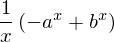

In [55]:
x = symbols('x', real=True)
expr = (b**x - a**x )/ x
expr

Obtenemos el límite con la función **limit()** y si queremos dejarlo indicado, podemos usar **Limit()**:

In [56]:
limit(expr, x, 0)

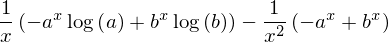

In [57]:
diff(expr, x)

## Series

La expansión en serie es también una de las características más útiles de un CAS. En SymPy podemos realizar una expansión en serie de una expresión usando la función **series**:

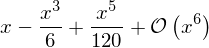

In [58]:
series(sin(x), x)

Por defecto expande la expresión alrededor de $ x = 0 $, pero podemos expandir alrededor de cualquier valor de $ x $ incluyendo explícitamente un valor en la llamada a la función:

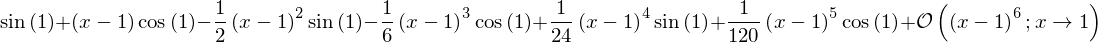

In [59]:
series(sin(x), x, 1)

Y podemos definir explícitamente a qué orden se debe llevar a cabo la expansión de la serie:

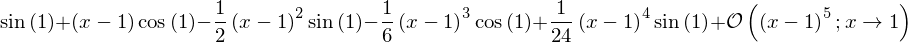

In [60]:
series(sin(x), x, 1, n=5)

Si queremos remover el O(x)

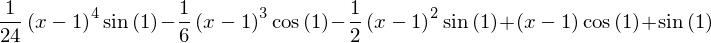

In [61]:
series(sin(x),x,1,n=5).removeO()

## Álgebra Lineal

### Matrices
Las matrices se definen mediante la clase Matrix:

In [62]:
a11, a12, a21, a22 = symbols("a11, a12, a21, a22")
b11, b12, b21, b22 = symbols("b11, b12, b21, b22")
v1, v2 = symbols("v1, v2")

In [63]:
A = Matrix([[a11, a12],[a21, a22]])
B = Matrix([[b11, b12],[b21, b22]])

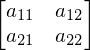

In [64]:
A

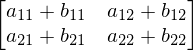

In [65]:
A + B

In [66]:
v = Matrix([[v1], [v2]])
v

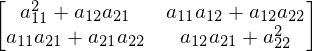

In [67]:
A**2

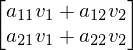

In [68]:
A * v

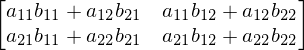

In [69]:
A * B

Para calcular determinantes e inversos, y similares:

In [70]:
A.det() # Determinante

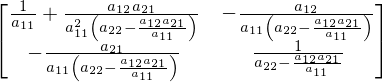

In [71]:
A.inv() # Inversa de la matriz

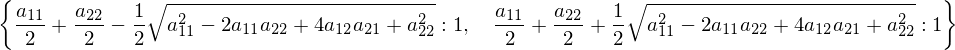

In [72]:
# Para los autovalores
A.eigenvals()

### Resolución de ecuaciones

Como se ha mencionado anteriormente las ecuaciones no se pueden crear con el = sino con la palabra **Eq**:

In [73]:
Eq(x ** 2 - x, 3)

In [74]:
ecuacion = Eq(x ** 2 - x - 3)

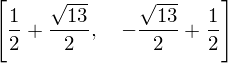

In [75]:
solve(ecuacion)

In [76]:
solve(x**2 - 1, x)

Para un sistema de ecuaciones:

In [77]:
solve([x + y - 1, x - y - 1], [x,y])

Ahora supongamos que tenemos la siguiente ecuación:

$$ \pi e^{\frac{x}{t}} = C $$

In [78]:
# Creamos los símbolos y la ecuación
x, t, C = symbols('x, t, C', real=True)
ecuacion = Eq(pi * exp(x/t), C)
ecuacion

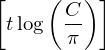

In [79]:
# Resolviendo
solve(ecuacion ,x)

### Ecuaciones diferenciales

Tratemos de resolver, por ejemplo:

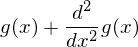

In [82]:
x, g = symbols('x g')
expresion = g(x).diff(x, x) + g(x)
expresion

In [84]:
dsolve(expresion, g(x))

Si uno quiere la ecuación diferencial sea resuelta de un modo en particular, puede incluir "pistas" como segundo argumento de dsolve para guiarlo en la resolución:

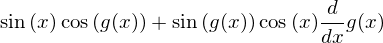

In [86]:
expresion2 = sin(x)*cos(g(x)) + cos(x)*sin(g(x))*g(x).diff(x)
expresion2

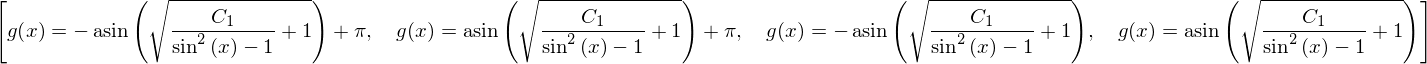

In [87]:
dsolve(expresion, g(x), hint='separable')